# LUME-Astra Basic Examples

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Nicer plotting
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format = 'retina'

Make an Astra object

In [2]:
from astra import Astra

In [3]:
A = Astra('templates/dcgun/astra.in')

Change some inputs

In [4]:
A.input['newrun']['zemit']  = 1000
A.input['newrun']['zphase'] = 20
A.input['newrun']['phases'] = True
A.input['output']['zstop']  = 1

# Special flags
A.timeout = None
A.verbose = True

Run

In [5]:
A.run()

 --------------------------------------------------------------------------

                Astra- A space charge tracking algorithm 
               Version 4.0 - macOS 64bit - Apple Silicon   
                        DESY,  Hamburg 2022          
                        Wed Aug  2 08:47:11 

     Parameter file is:  astra.in                                          
     astra input file for L0 injector (20070501_1)                                   

 Initialize element settings:
     neglecting space charge forces 

 --------------------------------------------------------------------------
 Cavity:

     Reading cavity field data from:      dcgun_GHV.dat                                                                   
     maximum gradient                     -11.60     MV/m
     at                                   3.9750E-02 m
     estimated average gradient            2.353     MV/m
     nominal phase                         0.000     deg

 -----------------------------------

Output is automatically parsed into a .output dict

In [6]:
A.output.keys()

dict_keys(['stats', 'particles', 'run_info', 'other'])

These are the statistics from Astra's Xemit style files

In [7]:
A.output['stats'].keys()

dict_keys(['mean_z', 'mean_t', 'mean_x', 'sigma_x', 'sigma_xp', 'norm_emit_x', 'cov_x__xp', 'mean_y', 'sigma_y', 'sigma_yp', 'norm_emit_y', 'cov_y__yp', 'mean_kinetic_energy', 'sigma_z', 'sigma_energy', 'norm_emit_z', 'cov_z__energy'])

Some simple run info:

In [8]:
A.output['run_info']

{'start_time': 1690991231.730855,
 'run_script': '/Users/chrisonian/Code/Astra/bin/Astra astra.in',
 'run_time': 0.9639010429382324}

Other data, such as from the LandF file, are stored in `other`:

In [9]:
A.output['other']

{'landf_z': array([0.      , 0.049975, 0.1     , 0.15    , 0.2     , 0.25    ,
        0.3     , 0.35    , 0.4     , 0.45    , 0.5     , 0.55    ,
        0.6     , 0.65    , 0.7     , 0.75    , 0.8     , 0.85    ,
        0.9     , 0.95    , 1.      ]),
 'landf_n_particles': array([2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000.]),
 'landf_total_charge': array([-0.e+00,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,
         1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,
         1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10,  1.e-10]),
 'landf_n_lost': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 'landf_energy_deposited': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 'landf_energy_exchange': array([ 0.0000e+00,  4.4737e-05,  5.2282e-

This is the path that work was done. By default, this will be automatically cleaned up.

In [10]:
A.path

'/var/folders/2f/l5_mybzs30j4qqvyj98w1_nw0000gn/T/tmpomok8c_z'

# Plotting

The Astra object has built in plotting. The defaults will plot the beam sizes as lines, data calculated from particles as dots, and the fieldmaps.

Loading fieldmap file /Users/chrisonian/Code/GitHub/lume-astra/docs/examples/templates/dcgun/dcgun_GHV.dat
Loading fieldmap file /Users/chrisonian/Code/GitHub/lume-astra/docs/examples/templates/dcgun/solenoid_SLA_L60.dat


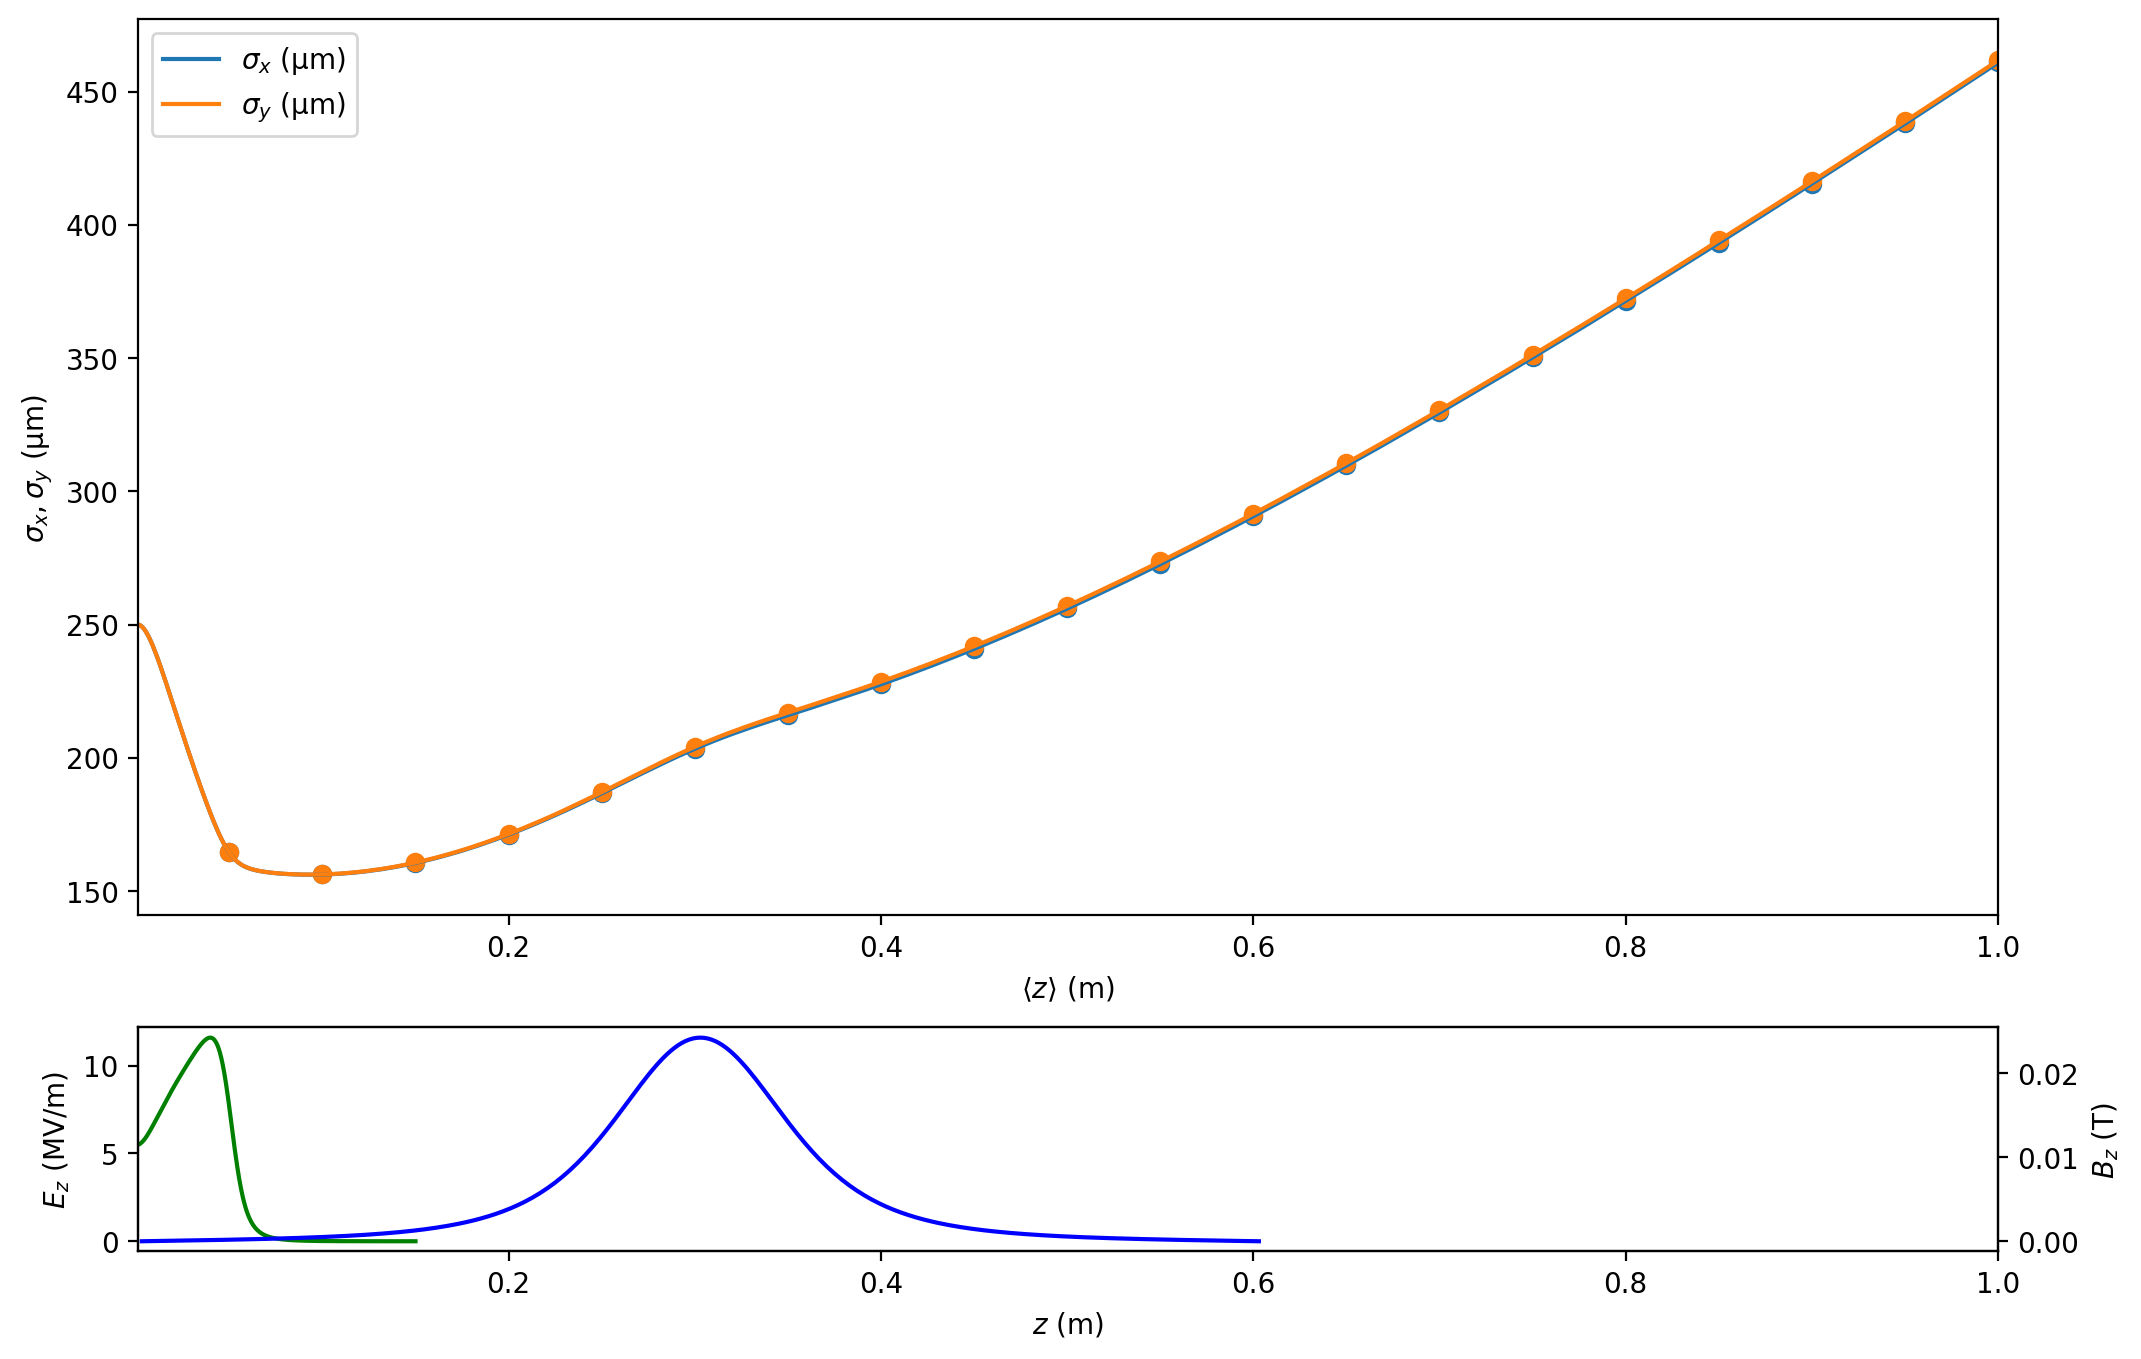

In [11]:
A.plot()

This has some fancier options:

Loading fieldmap file /Users/chrisonian/Code/GitHub/lume-astra/docs/examples/templates/dcgun/dcgun_GHV.dat
Loading fieldmap file /Users/chrisonian/Code/GitHub/lume-astra/docs/examples/templates/dcgun/solenoid_SLA_L60.dat


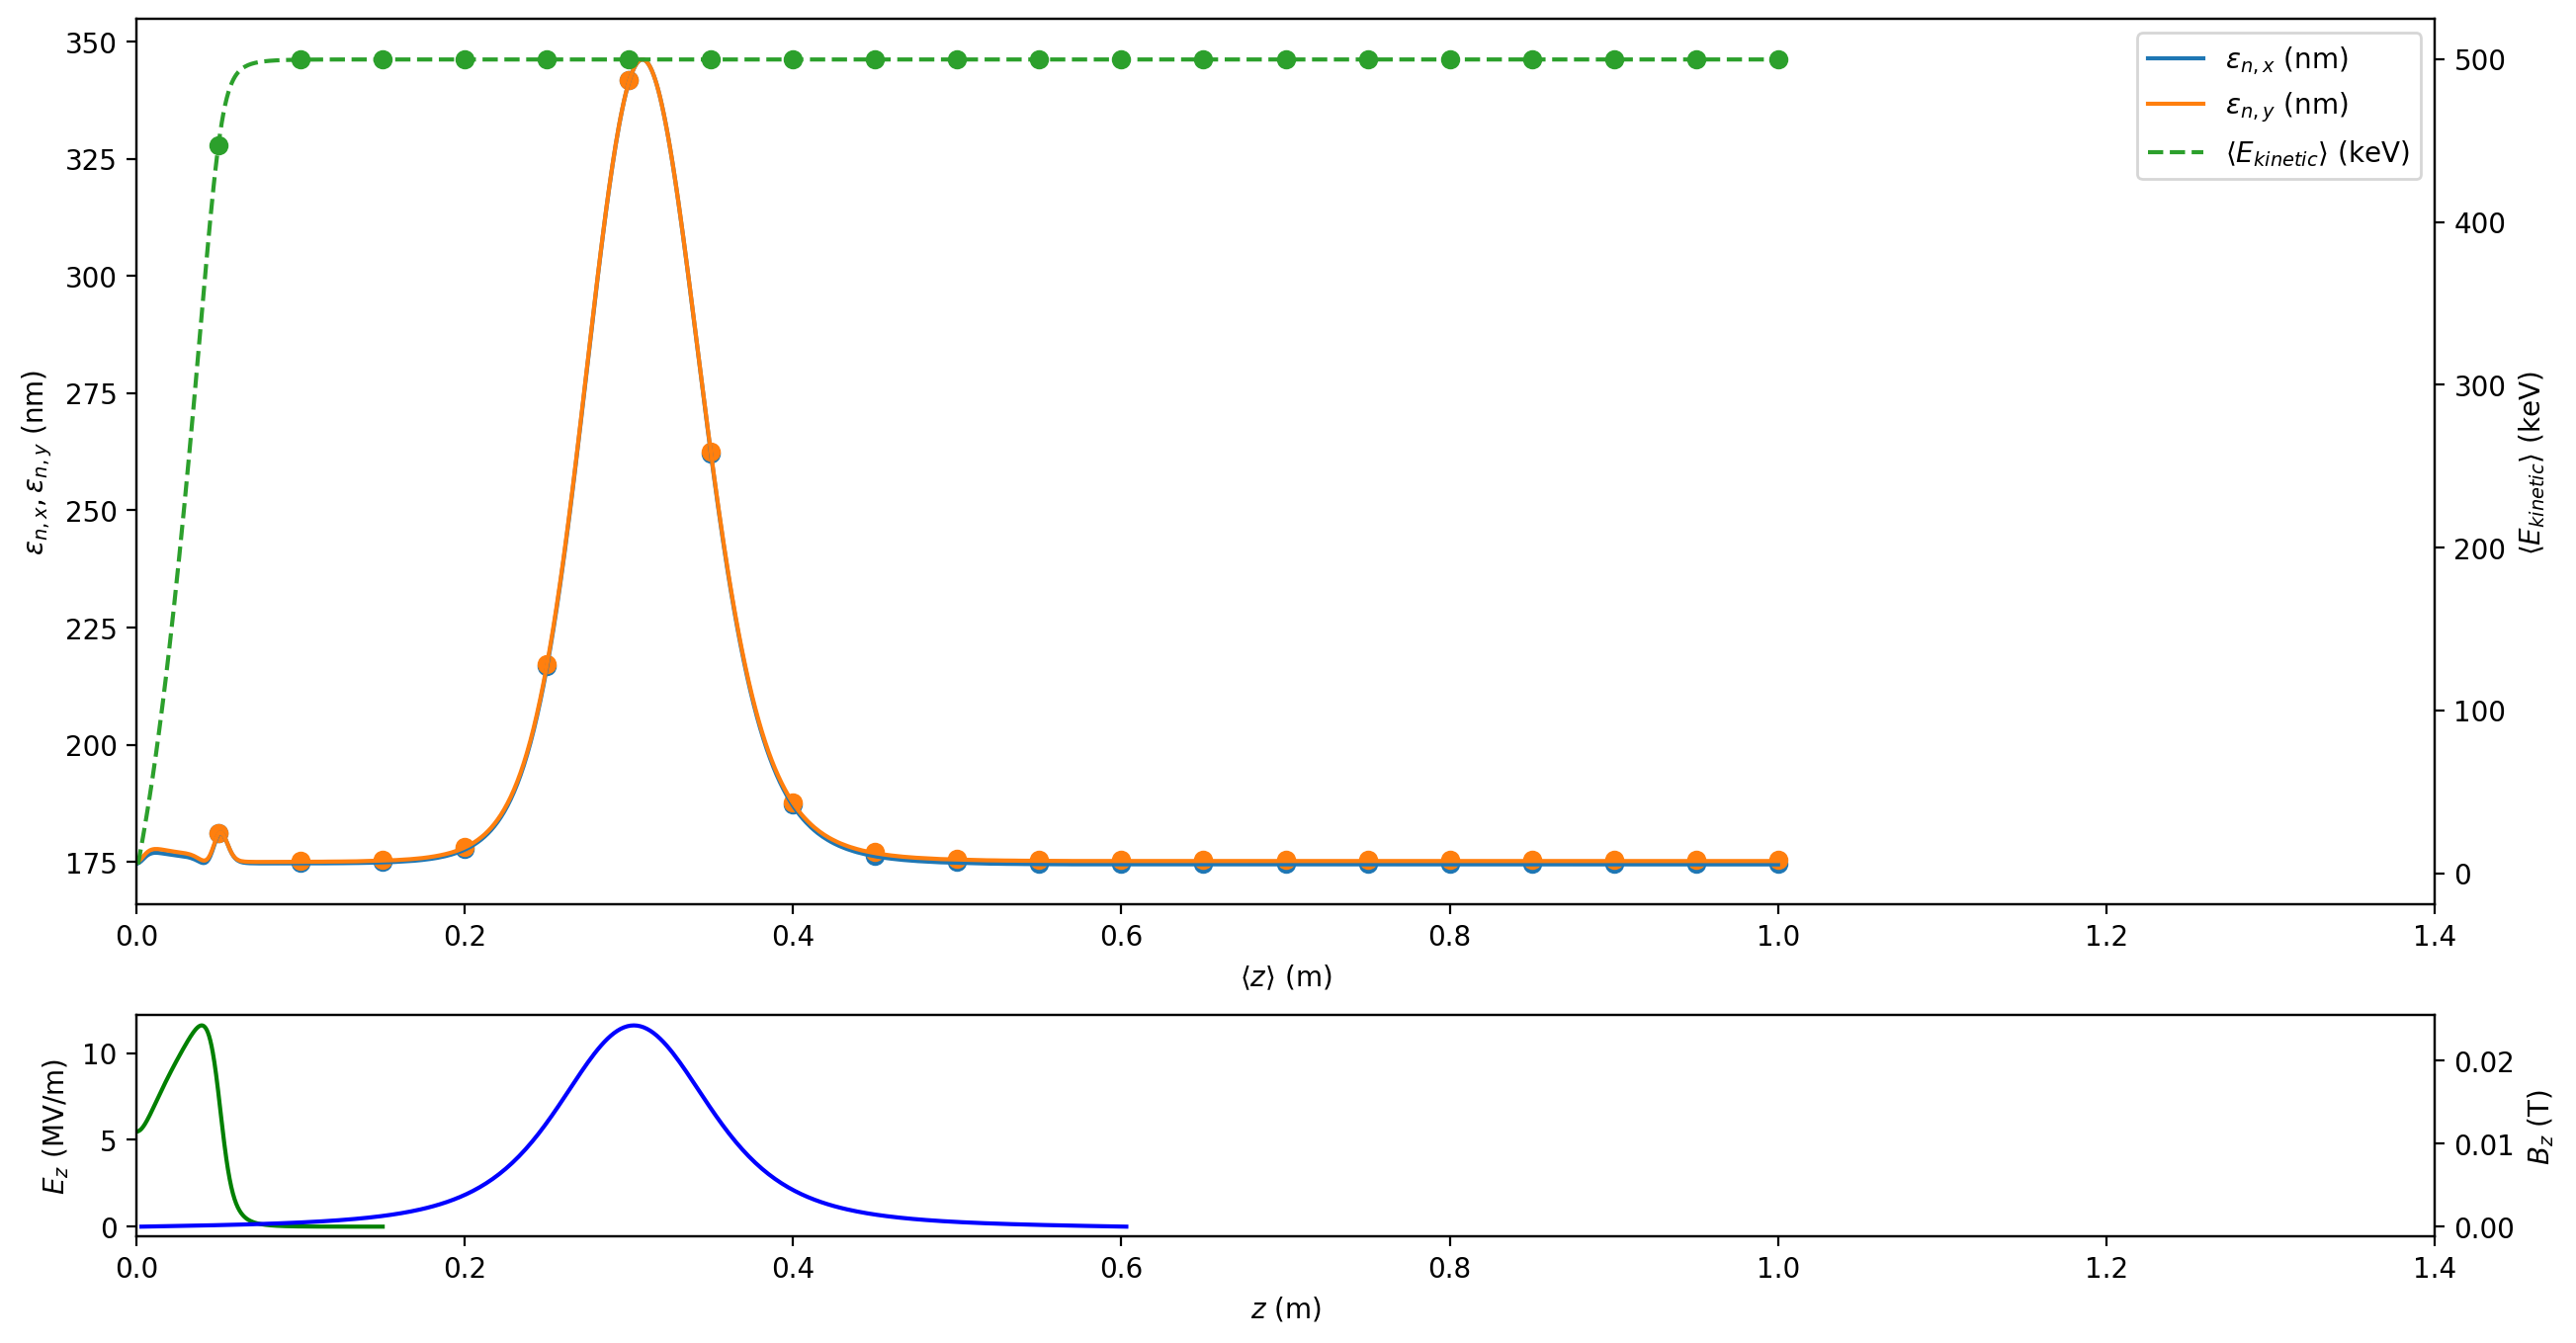

In [12]:
A.plot(['norm_emit_x', 'norm_emit_y'], y2='mean_kinetic_energy', xlim = (0, 1.4), figsize=(15,8) )

# Particles 

Particles are automatically parsed in to openpmd-beamphysics `ParticleGroup` objects

In [13]:
A.output['particles']

[<ParticleGroup with 1999 particles at 0x123d2fca0>,
 <ParticleGroup with 1999 particles at 0x123d2f490>,
 <ParticleGroup with 1999 particles at 0x123d2fb80>,
 <ParticleGroup with 1999 particles at 0x123d2fc70>,
 <ParticleGroup with 1999 particles at 0x123d2fc40>,
 <ParticleGroup with 1999 particles at 0x123d2faf0>,
 <ParticleGroup with 1999 particles at 0x123d2f880>,
 <ParticleGroup with 1999 particles at 0x123d2fe50>,
 <ParticleGroup with 1999 particles at 0x123d2f580>,
 <ParticleGroup with 1999 particles at 0x123d2f820>,
 <ParticleGroup with 1999 particles at 0x123d2f520>,
 <ParticleGroup with 1999 particles at 0x123d2ffa0>,
 <ParticleGroup with 1999 particles at 0x123d2fac0>,
 <ParticleGroup with 1999 particles at 0x123d2fa60>,
 <ParticleGroup with 1999 particles at 0x123d2f610>,
 <ParticleGroup with 1999 particles at 0x123d2f8e0>,
 <ParticleGroup with 1999 particles at 0x1058948e0>,
 <ParticleGroup with 1999 particles at 0x11e42ffd0>,
 <ParticleGroup with 1999 particles at 0x11e42

Get the last item, and request some statistic. `A.particles` points to `A.output['particles']` for convenience:

In [14]:
P = A.particles[-1]
P['mean_energy']

1010791.4018127845

Show the units:

In [15]:
P.units('mean_energy')

pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0))

This provides easy ploting:

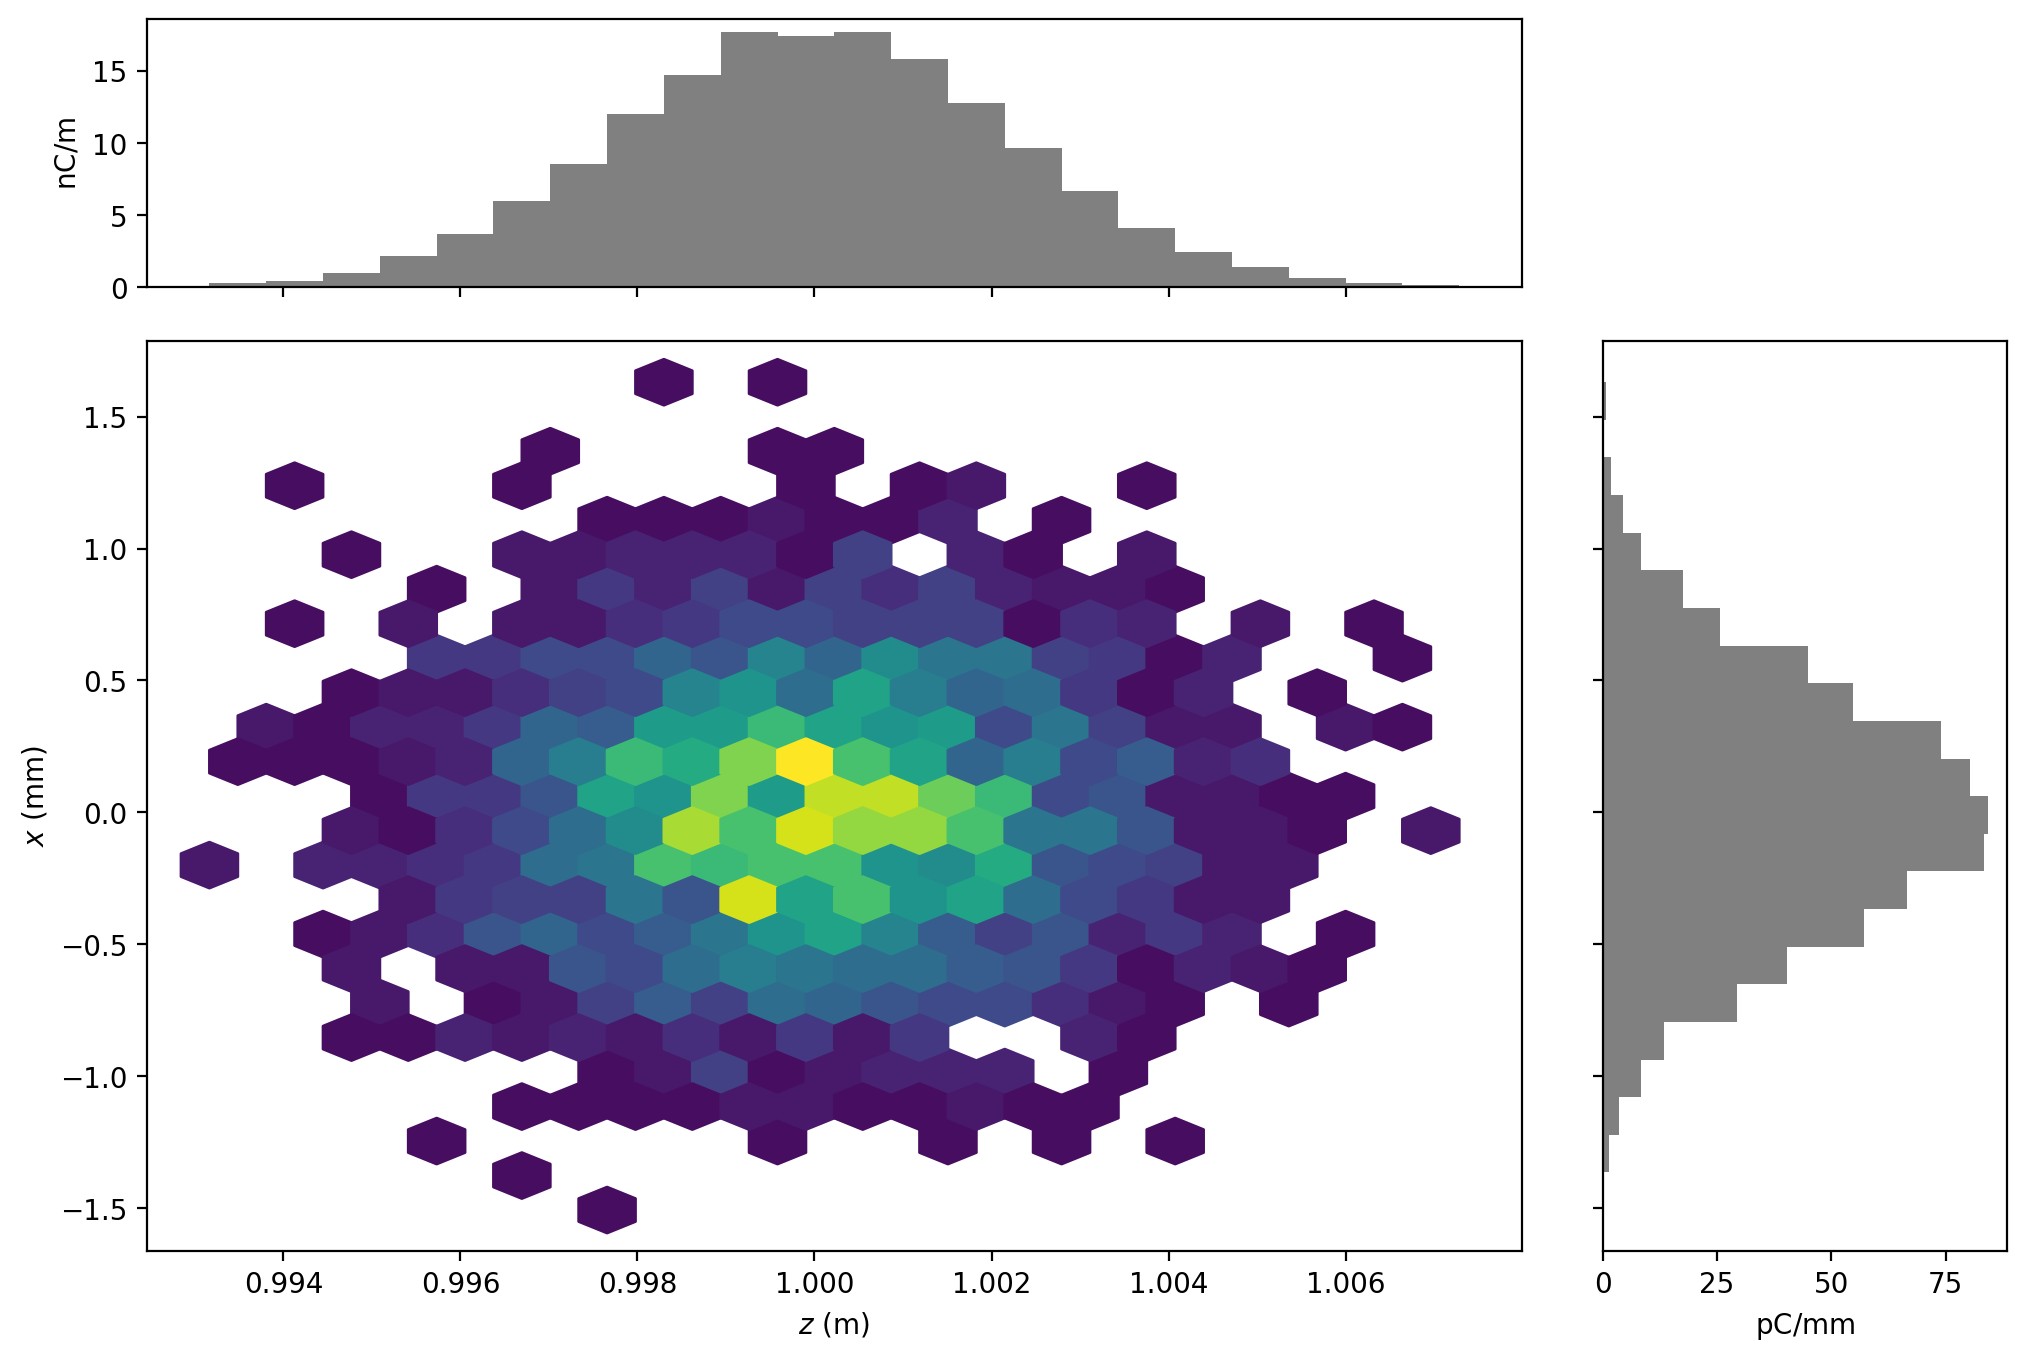

In [16]:
P.plot('z', 'x')

Traces can be made by gathering the coordinate arrays:

[]

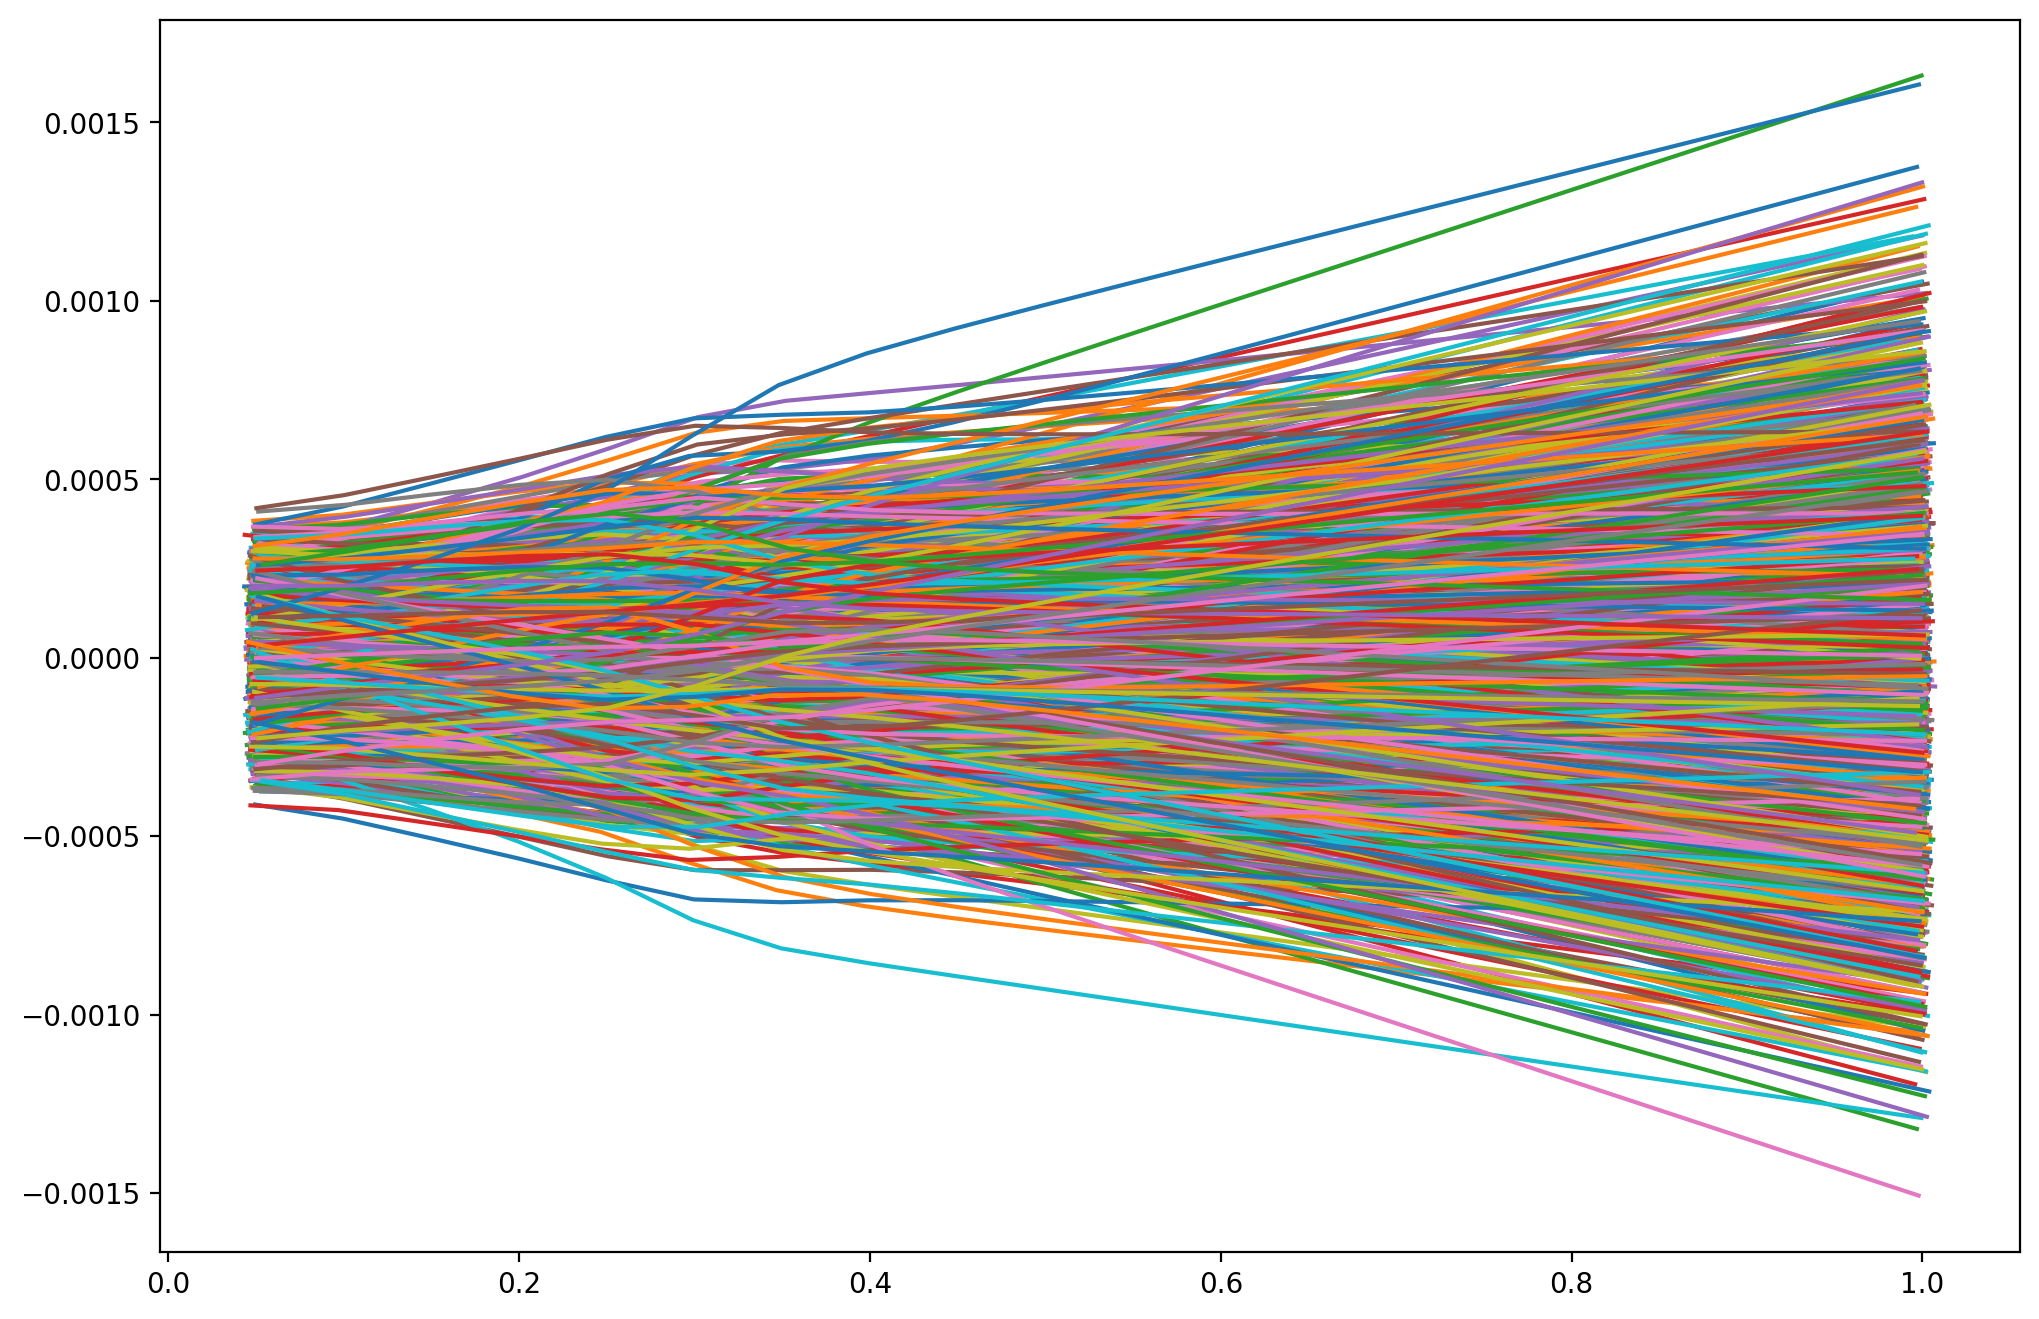

In [17]:
plt.plot(
    [P.z for P in  A.particles],
    [P.x for P in  A.particles]
)
plt.plot()

Change something, run, and plot again:

In [18]:
A.input['solenoid']['maxb(1)'] = 0.04
A.input['charge']['lspch'] =False
A.verbose=False
A.run()

Traces can be made by gathering the coordinate arrays

[]

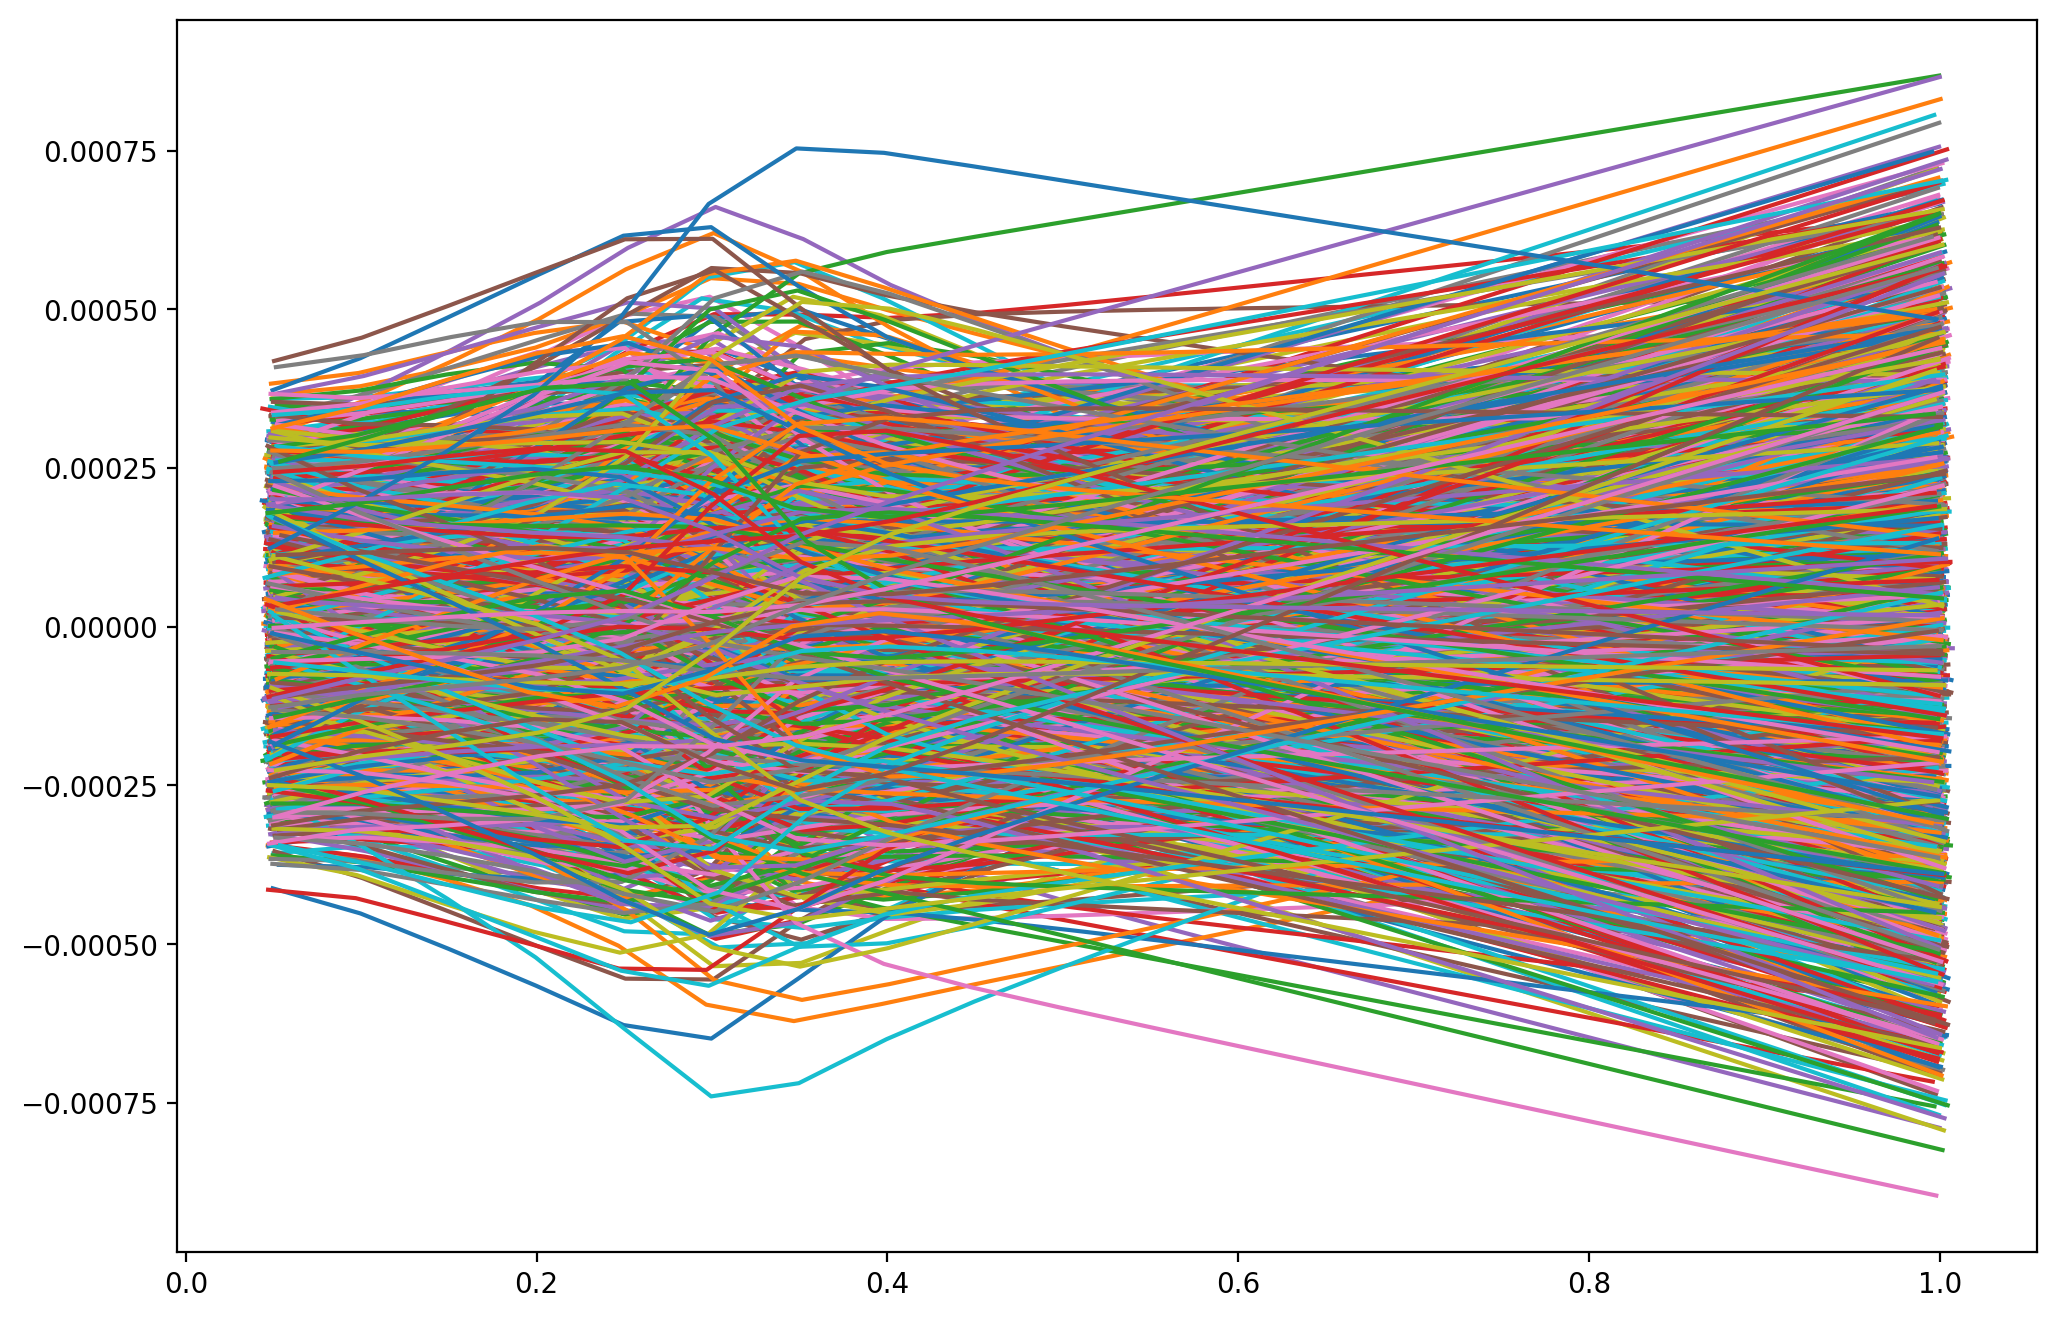

In [19]:

plt.plot(
    [P.z for P in  A.particles],
    [P.x for P in  A.particles]
)
plt.plot()

Similarly a 3D plot is made:

Text(0.5, 0, 'Y (µm)')

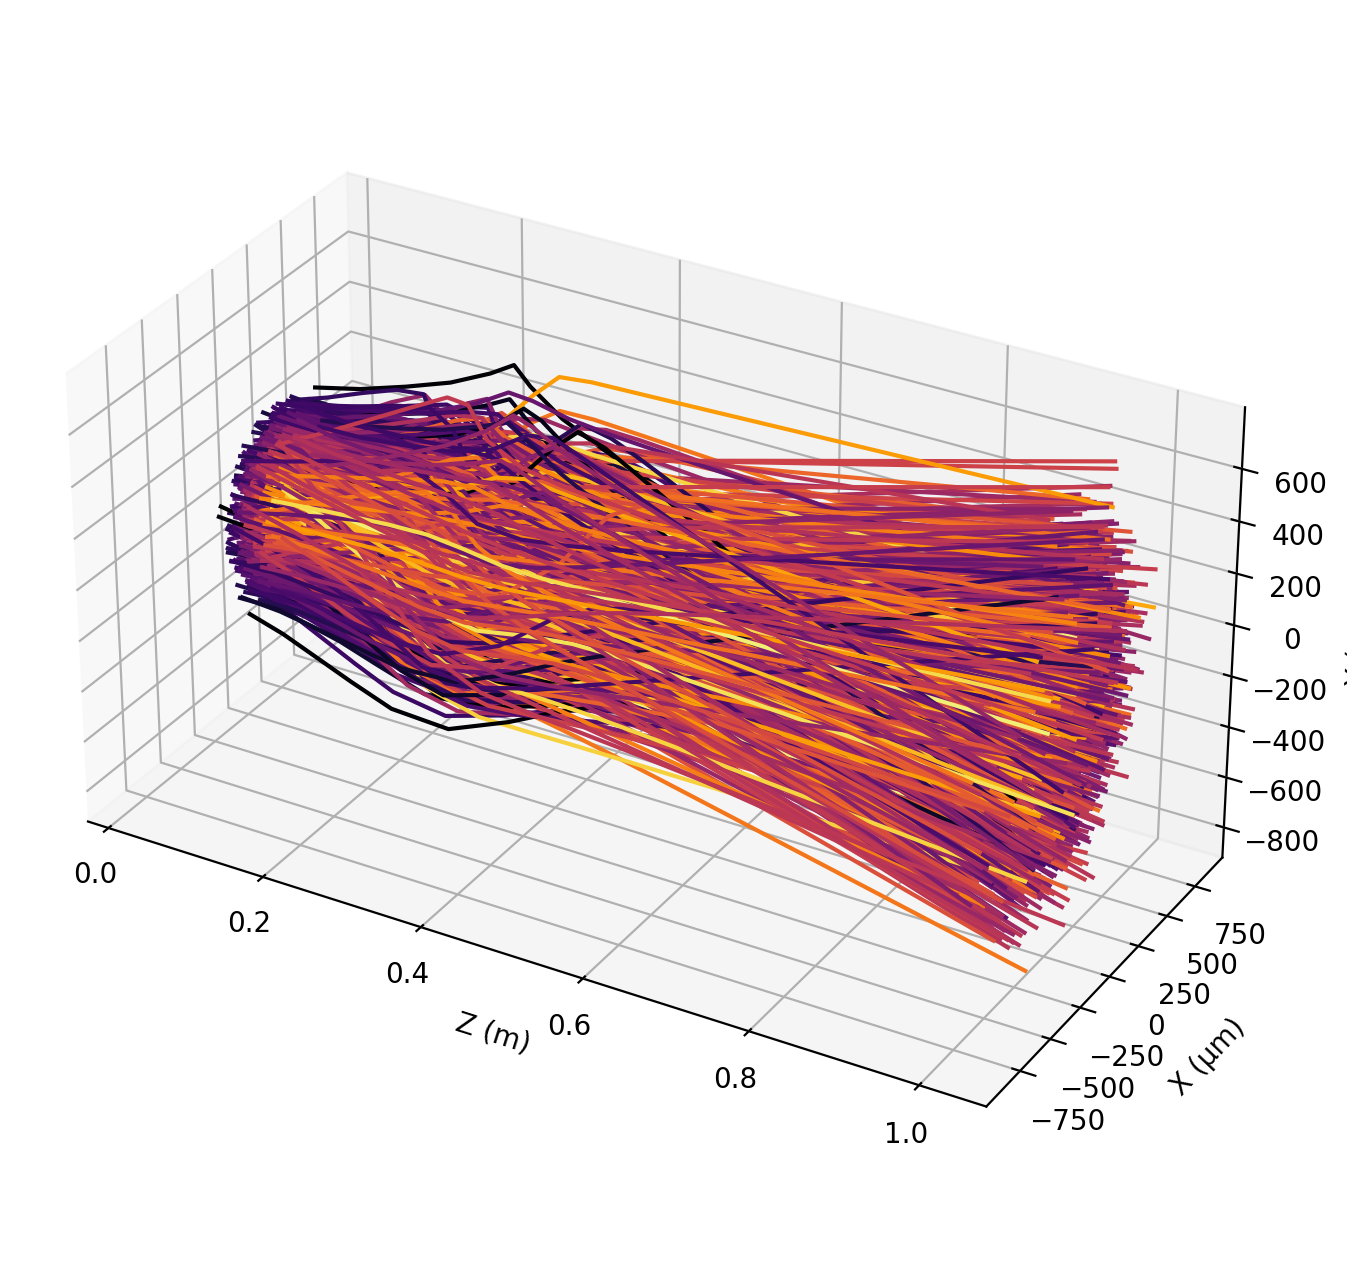

In [20]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = matplotlib.colormaps.get_cmap('inferno')

skip=1
X = np.array([P.x for P in  A.particles]).T[::skip]
Y = np.array([P.y for P in  A.particles]).T[::skip]
Z = np.array([P.z for P in  A.particles]).T[::skip]

scale = np.hypot(X[:, 0], Y[:,0]).max()

# color by  initial radius
for i in range(len(X)):
    color = cmap(1-np.hypot(X[i,0], Y[i,0])/scale)
    ax.plot(X[i]*1e6, Y[i]*1e6, Z[i], zdir='x', color=color)

ax.set_box_aspect((2,1,1))    
    
ax.set_xlabel('Z (m)')
ax.set_ylabel('X (µm)')
ax.set_zlabel('Y (µm)')

# plt.savefig('test.png', dpi=150)

# Stats

Astra computes statistics in several output tables.

Astra's own calculated statistics can be retieved:


In [21]:
len(A.stat('norm_emit_x')), A.stat('norm_emit_x')[-1]

(999, 1.7458e-07)

Statistics can also be calculated directly from the particles:

In [22]:
A.particle_stat('norm_emit_x')

array([1.81468749e-07, 1.75285393e-07, 1.75882138e-07, 1.83314665e-07,
       2.74161838e-07, 4.91320089e-07, 3.13178319e-07, 1.89493985e-07,
       1.76465214e-07, 1.75297891e-07, 1.75144984e-07, 1.75126206e-07,
       1.75127277e-07, 1.75127277e-07, 1.75127277e-07, 1.75127277e-07,
       1.75127277e-07, 1.75127277e-07, 1.75127277e-07, 1.75127277e-07])

 Compare these:

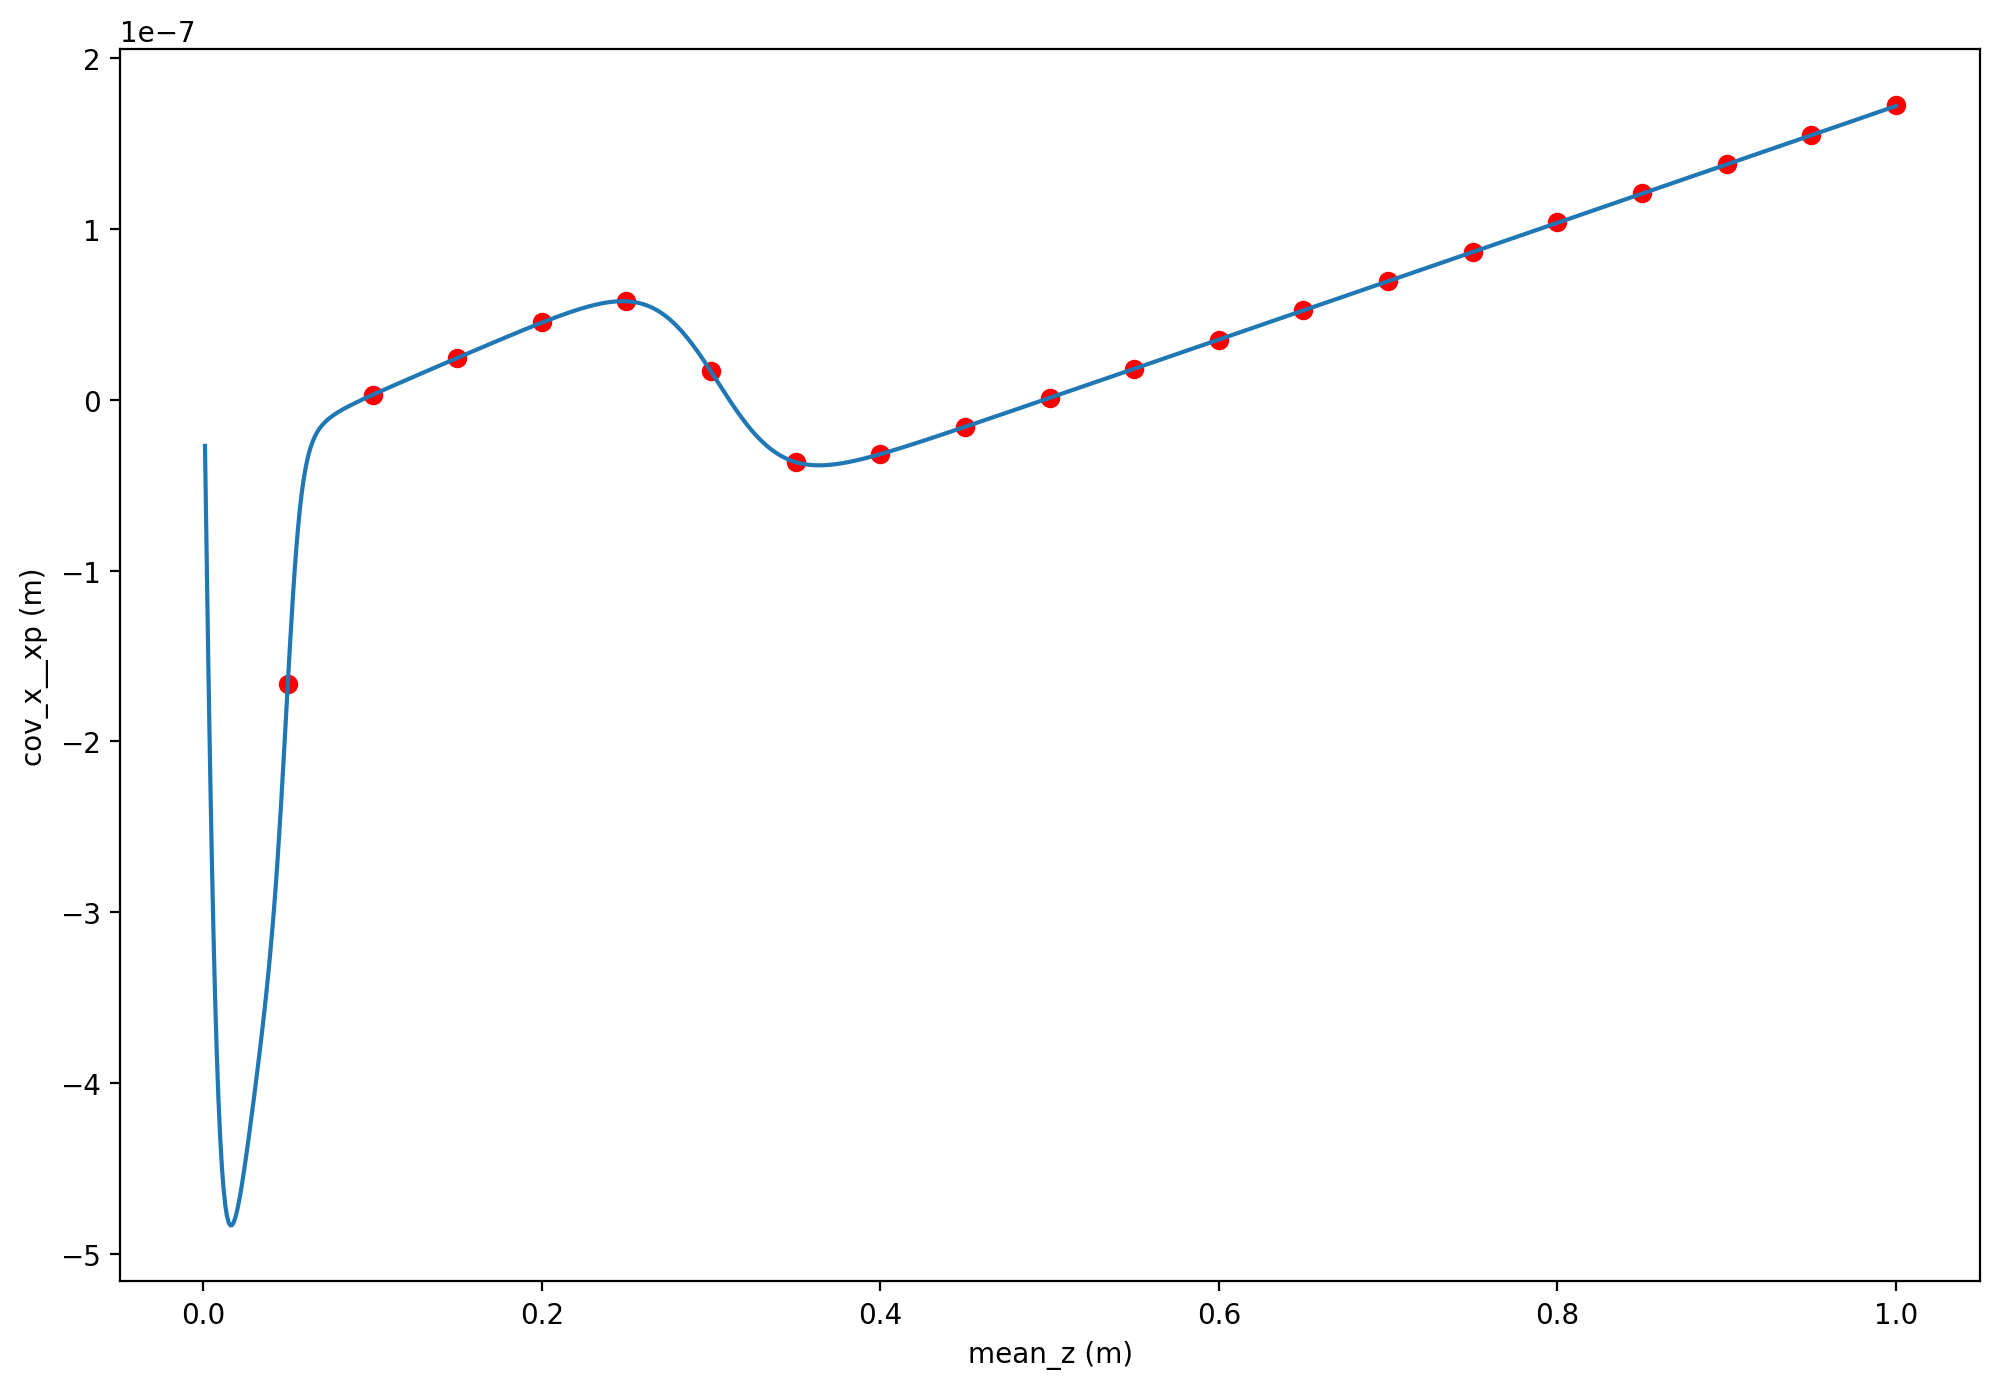

In [23]:
key1 = 'mean_z'
key2 = 'cov_x__xp'
units1 = str(A.units(key1))
units2 = str(A.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(A.stat(key1), A.stat(key2))
plt.scatter(A.particle_stat(key1), A.particle_stat(key2), color='red')
#plt.scatter(A.particle_stat(key1, alive_only=False), A.particle_stat(key2, alive_only=False), color='green')

# Fieldmaps

Normally fieldmaps are not loaded into the Astra object. However, for analysis and archiving they can be loaded.

Initially this is empty:

In [24]:
A.fieldmap 

{}

In [25]:
A.verbose=True
A.load_fieldmaps()

Loading fieldmap file /Users/chrisonian/Code/GitHub/lume-astra/docs/examples/templates/dcgun/dcgun_GHV.dat
Loading fieldmap file /Users/chrisonian/Code/GitHub/lume-astra/docs/examples/templates/dcgun/solenoid_SLA_L60.dat


A second load just referes to the internal dict.

In [26]:
A.load_fieldmaps()

Fieldmap inside dict: dcgun_GHV.dat
Fieldmap inside dict: solenoid_SLA_L60.dat


This will write them to `A.path`:

In [27]:
A.write_fieldmaps()

2 fieldmaps written to /var/folders/2f/l5_mybzs30j4qqvyj98w1_nw0000gn/T/tmpomok8c_z


# Load previously computed run

If Astra was executed manually, and the output files exist along side the input, the Astra object can load them

In [28]:
A2 = Astra(input_file=A.input_file, use_temp_dir = False )
A2.load_output()
A2.output.keys()

dict_keys(['stats', 'particles', 'run_info', 'other'])

# Archive all output

All of .input and .output can be archived and loaded from standard h5 files.

Particles are stored in the openPMD-beamphysics format.

In [29]:
H5FILE='astra.h5'

In [30]:
A.archive(H5FILE)

Archiving to file astra.h5


'astra.h5'

If no file is given, a filename will be invented based on the fingerprint:

In [31]:
H5FILE2 = A.archive()
H5FILE2

Archiving to file astra_748a9ef8ab7b82b51f32a520c4c1bed5.h5


'astra_748a9ef8ab7b82b51f32a520c4c1bed5.h5'

These can be loaded into completely empty objects:

In [32]:
A3 = Astra.from_archive(H5FILE2)

Check that the fingerprints are the same


In [33]:
A3.fingerprint() == A.fingerprint()

True

Spot check that the loaded data is the same as the original:

In [34]:
A3.stat('sigma_z')[-1] == A.stat('sigma_z')[-1]

True

Re-configure to set up working dir and run again:

In [35]:
A3.configure()
A3.run()



Check stats again:


In [36]:
A3.stat('sigma_z')[-1] == A.stat('sigma_z')[-1]

True

Fieldmaps are in here, because they were loaded

In [37]:
A3.fieldmap.keys()

dict_keys(['dcgun_GHV.dat', 'solenoid_SLA_L60.dat'])

# Reading archived files manually

Let's open one of these files manually using `h5py`:

In [38]:
from h5py import File

In [39]:
h5 = File(H5FILE, 'r')

Basic input and output groups are at the top level

In [40]:
list(h5)

['fieldmap', 'input', 'output']

Input corresponds to the Asta namelist inputs

In [41]:
list(h5['input'])

['aperture',
 'cavity',
 'charge',
 'fem',
 'newrun',
 'output',
 'quadrupole',
 'scan',
 'solenoid']

The actual values are in attrs. Retrieve them by casting to a dict:

In [42]:
dict(h5['input']['newrun'].attrs)

{'auto_phase': True,
 'cathodes': False,
 'distribution': '/Users/chrisonian/Code/GitHub/lume-astra/docs/examples/templates/dcgun/generator.part',
 'emits': True,
 'h_max': 0.002,
 'h_min': 0.0002,
 'head': "'astra input file for L0 injector (20070501_1)'",
 'landfs': True,
 'larmors': False,
 'lmagnetized': True,
 'loop': False,
 'lproject_emit': False,
 'phase_scan': False,
 'phases': True,
 'refs': False,
 'run': 1,
 'screen': array([1.1, 2.2]),
 't_phases': False,
 'tchecks': False,
 'track_all': True,
 'tracks': False,
 'zemit': 1000,
 'zphase': 20,
 'zstart': 0,
 'zstop': 1}

Output contains these datasets:

In [43]:
list(h5['output'])

['other', 'particles', 'stats']

Example dataset:

In [44]:
h5['output']['stats']['norm_emit_x'][-1]

1.7458e-07

Unit information is stored in the attributes:

In [45]:
dict(h5['output']['stats']['norm_emit_x'].attrs)

{'unitDimension': array([1, 0, 0, 0, 0, 0, 0]), 'unitSI': 1, 'unitSymbol': 'm'}

These can be read in with the units using a helper function:

In [46]:
from pmd_beamphysics.units import read_dataset_and_unit_h5

dat, unit = read_dataset_and_unit_h5(h5['output']['stats']['norm_emit_x'])
unit

pmd_unit('m', 1, (1, 0, 0, 0, 0, 0, 0))

Particles are stored in the openPMD-beamphysics standard:

In [47]:
list(h5['output']['particles']['0'])

['momentum', 'particleStatus', 'position', 'time', 'weight']

These can be read in as a ParticleGroup object. This is the same type of object that A.particles is kept as.

In [48]:
from pmd_beamphysics import ParticleGroup
P = ParticleGroup(h5['output']['particles']['0'])
P['norm_emit_x']

1.8106484483117692e-07

Cleanup

In [49]:

import os

os.remove(H5FILE)
os.remove(H5FILE2)

# ControlGroup objects

Some elements need to be changed together, either relatively or absolutely.

Note: this was borroed from lume-impact almost verbatim. Some of the terminology should be reworked.

In [50]:
A.input['solenoid']

{'lbfield': True,
 'file_bfield(1)': 'solenoid_SLA_L60.dat',
 's_pos(1)': 0.303,
 'maxb(1)': 0.04,
 's_xoff(1)': 0,
 's_yoff(1)': 0,
 's_smooth(1)': 0,
 's_higher_order(1)': True}

In [51]:
A9 = A.copy()
A9.add_group('CAV1', ele_names=['cavity'], attributes=['maxe(1)'], var_name='voltage', factors=[1e-6], absolute=True)

ControlGroup(**{"ele_names": ["cavity"], "var_name": "voltage", "attributes": ["maxe(1)"], "factors": [1e-06], "reference_values": [-11.6], "absolute": true, "value": 0.0})

In [52]:
A9.add_group('SOL1', ele_names=['solenoid'], attributes=['s_pos(1)'], var_name='offset', absolute=False)

ControlGroup(**{"ele_names": ["solenoid"], "var_name": "offset", "attributes": ["s_pos(1)"], "factors": [1.0], "reference_values": [0.303], "absolute": false, "value": 0.0})

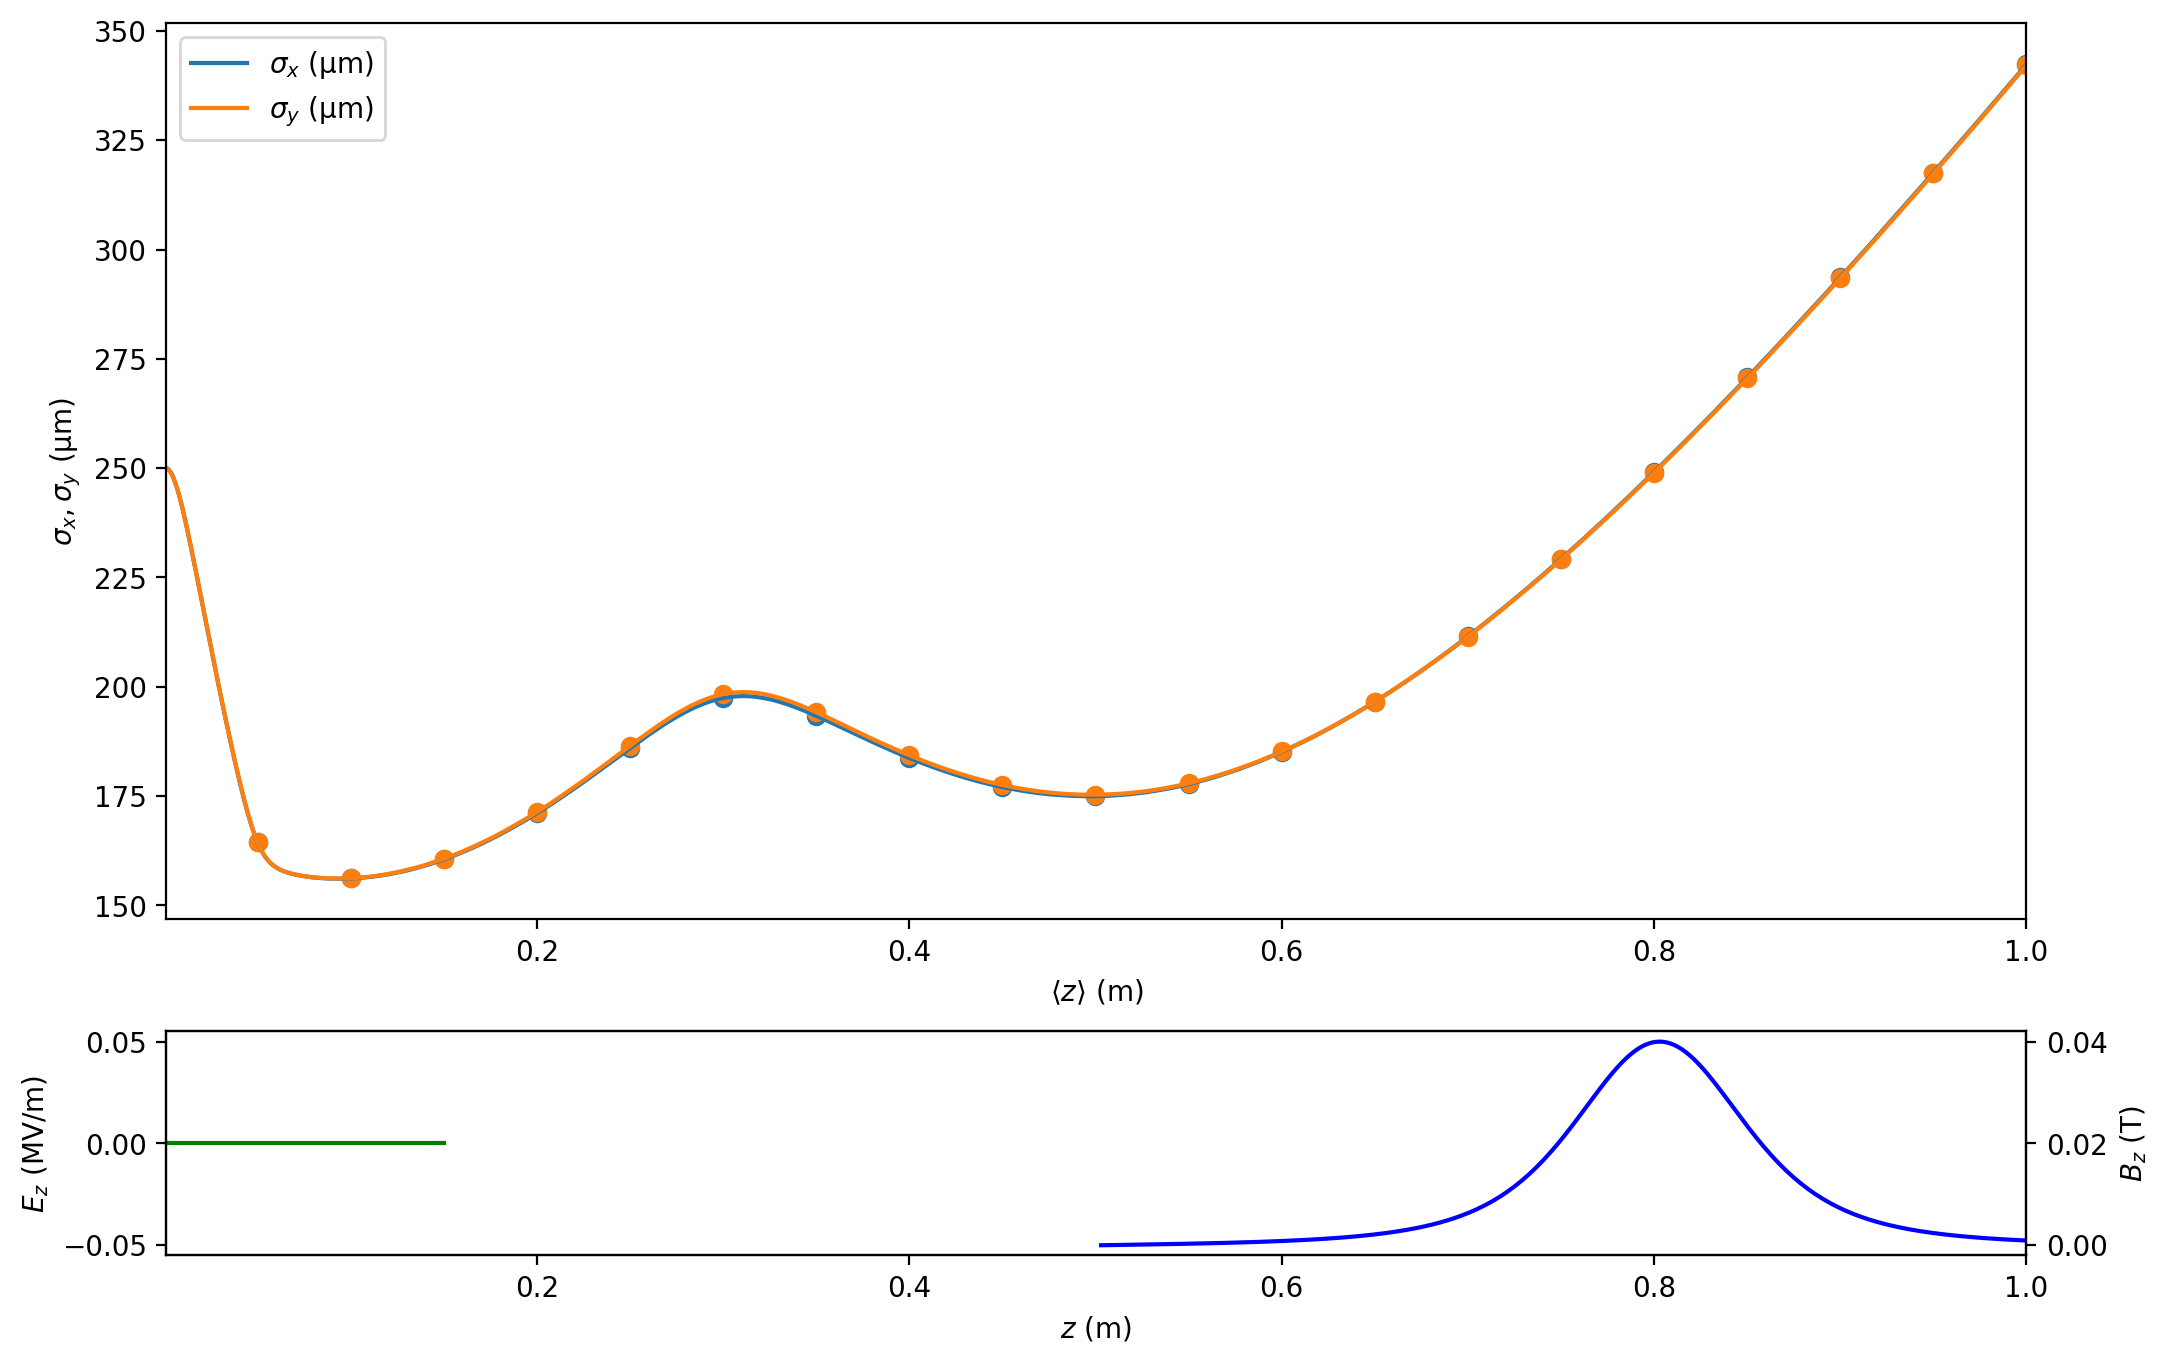

In [53]:
A9.group['SOL1']['offset'] =0.5
A9.plot()

# Attribute [] syntax

Values of the input namelists, as well as group attributes, can be set with the bracket syntax.

Get an entire namelist:


In [54]:
A['solenoid']

{'lbfield': True,
 'file_bfield(1)': 'solenoid_SLA_L60.dat',
 's_pos(1)': 0.303,
 'maxb(1)': 0.04,
 's_xoff(1)': 0,
 's_yoff(1)': 0,
 's_smooth(1)': 0,
 's_higher_order(1)': True}

Get an attribute:

In [55]:
A['solenoid:maxb(1)']

0.04

Set an attribute, and read it back:

In [56]:
A['solenoid:maxb(1)'] = 1.2345
A['solenoid:maxb(1)']

1.2345

Return the last item in the particles list:

In [57]:
A['particles:-1']

<ParticleGroup with 1999 particles at 0x135a0da90>

Calculate a statistic:

In [58]:
A['particles:-1']['sigma_x']

0.000342383293735044

This does the same:

In [59]:
A['particles:-1:sigma_x']

0.000342383293735044

# Instantiate from YAML

All of the Astra object init arguments can be passed in a YAML file. Any of:

In [60]:
?Astra

In [61]:
YAML="""

# Any argument above. One exception is initial_particles: this should be a filename that is parsed into a ParticleGroup

input_file: templates/dcgun/astra.in

verbose: False

group:
  CAV1:
    ele_names: cavity
    var_name: voltage
    attributes: maxe(1)
    factors: [ 1.0e-6 ]  # V -> MV for Astra
    value: 1.234e+6
    absolute: T

  SOL1:
    ele_names: solenoid
    var_name: offset
    attributes: s_pos(1)
    value: 0.54321
    absolute: F


"""

A8 = Astra.from_yaml(YAML)
#A8.verbose

Check that this still works:

In [62]:
A8['CAV1']['voltage'] = 20e6
A8['cavity']['maxe(1)']

20.0

Move the solenoid around:

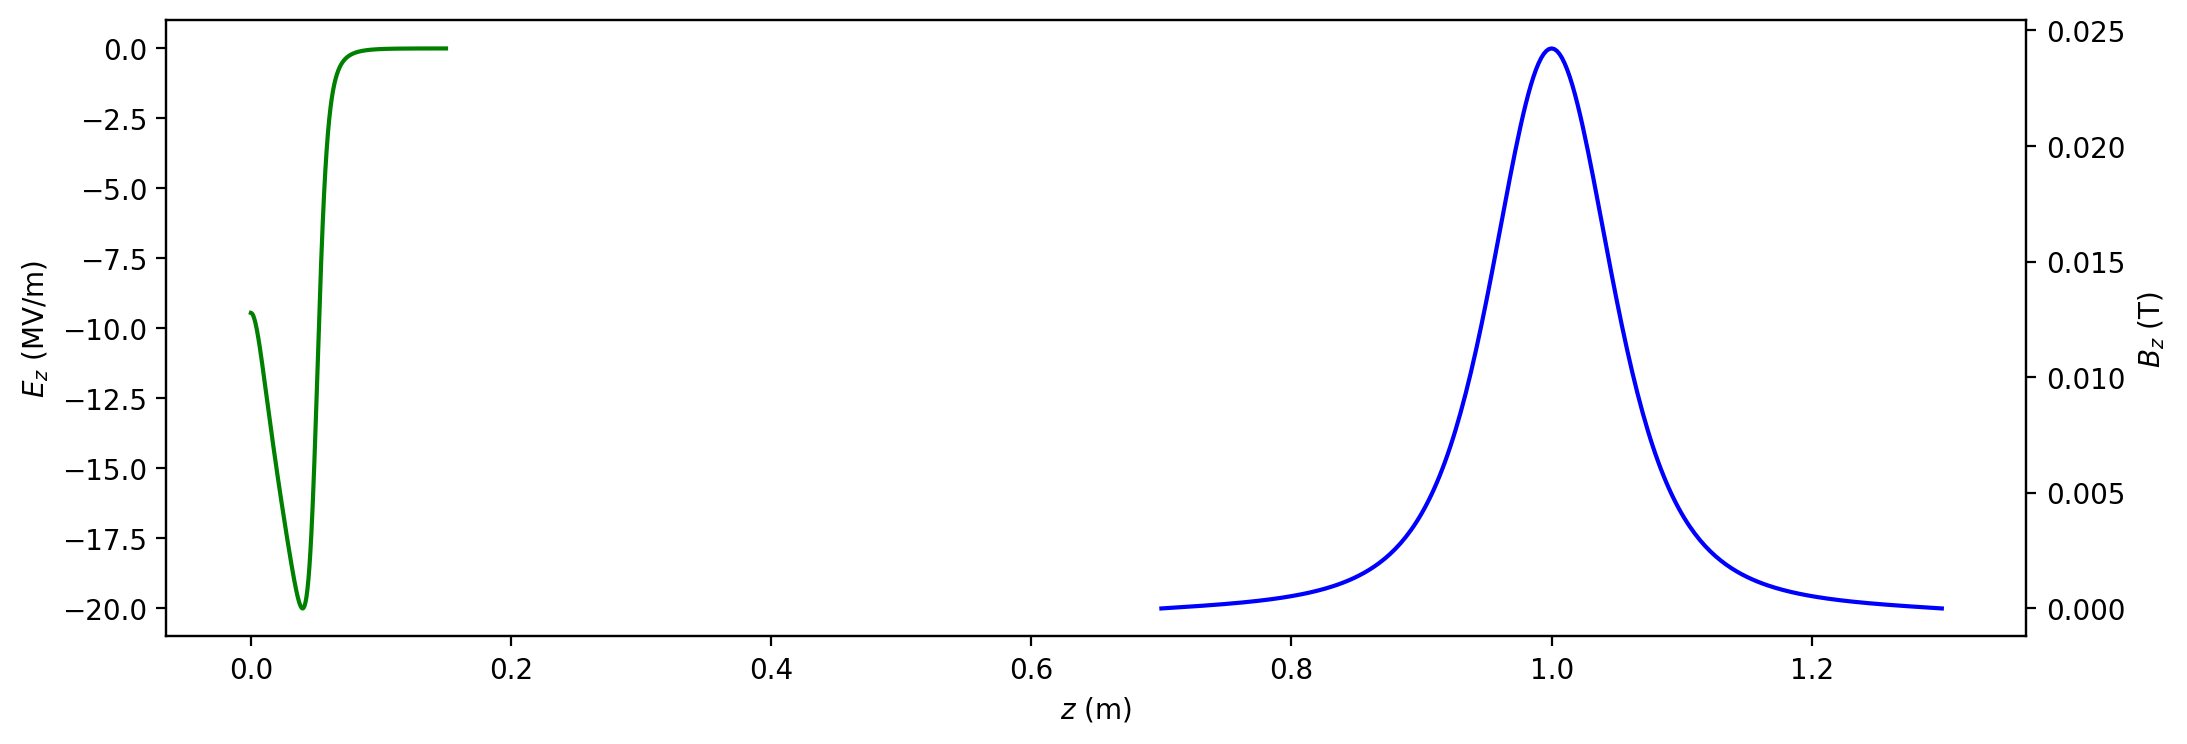

In [63]:
A8['SOL1:offset'] = 1
A8.plot_fieldmaps()

# Single particle tracking

`.track1` is a convenience to track a sincle particle through the system.

In [64]:
A = Astra()
A.track1(x0=1e-3, px0=-1e3, pz0=1e6)

Note: The following floating-point exceptions are signalling: IEEE_DIVIDE_BY_ZERO


<ParticleGroup with 1 particles at 0x1241bdf10>

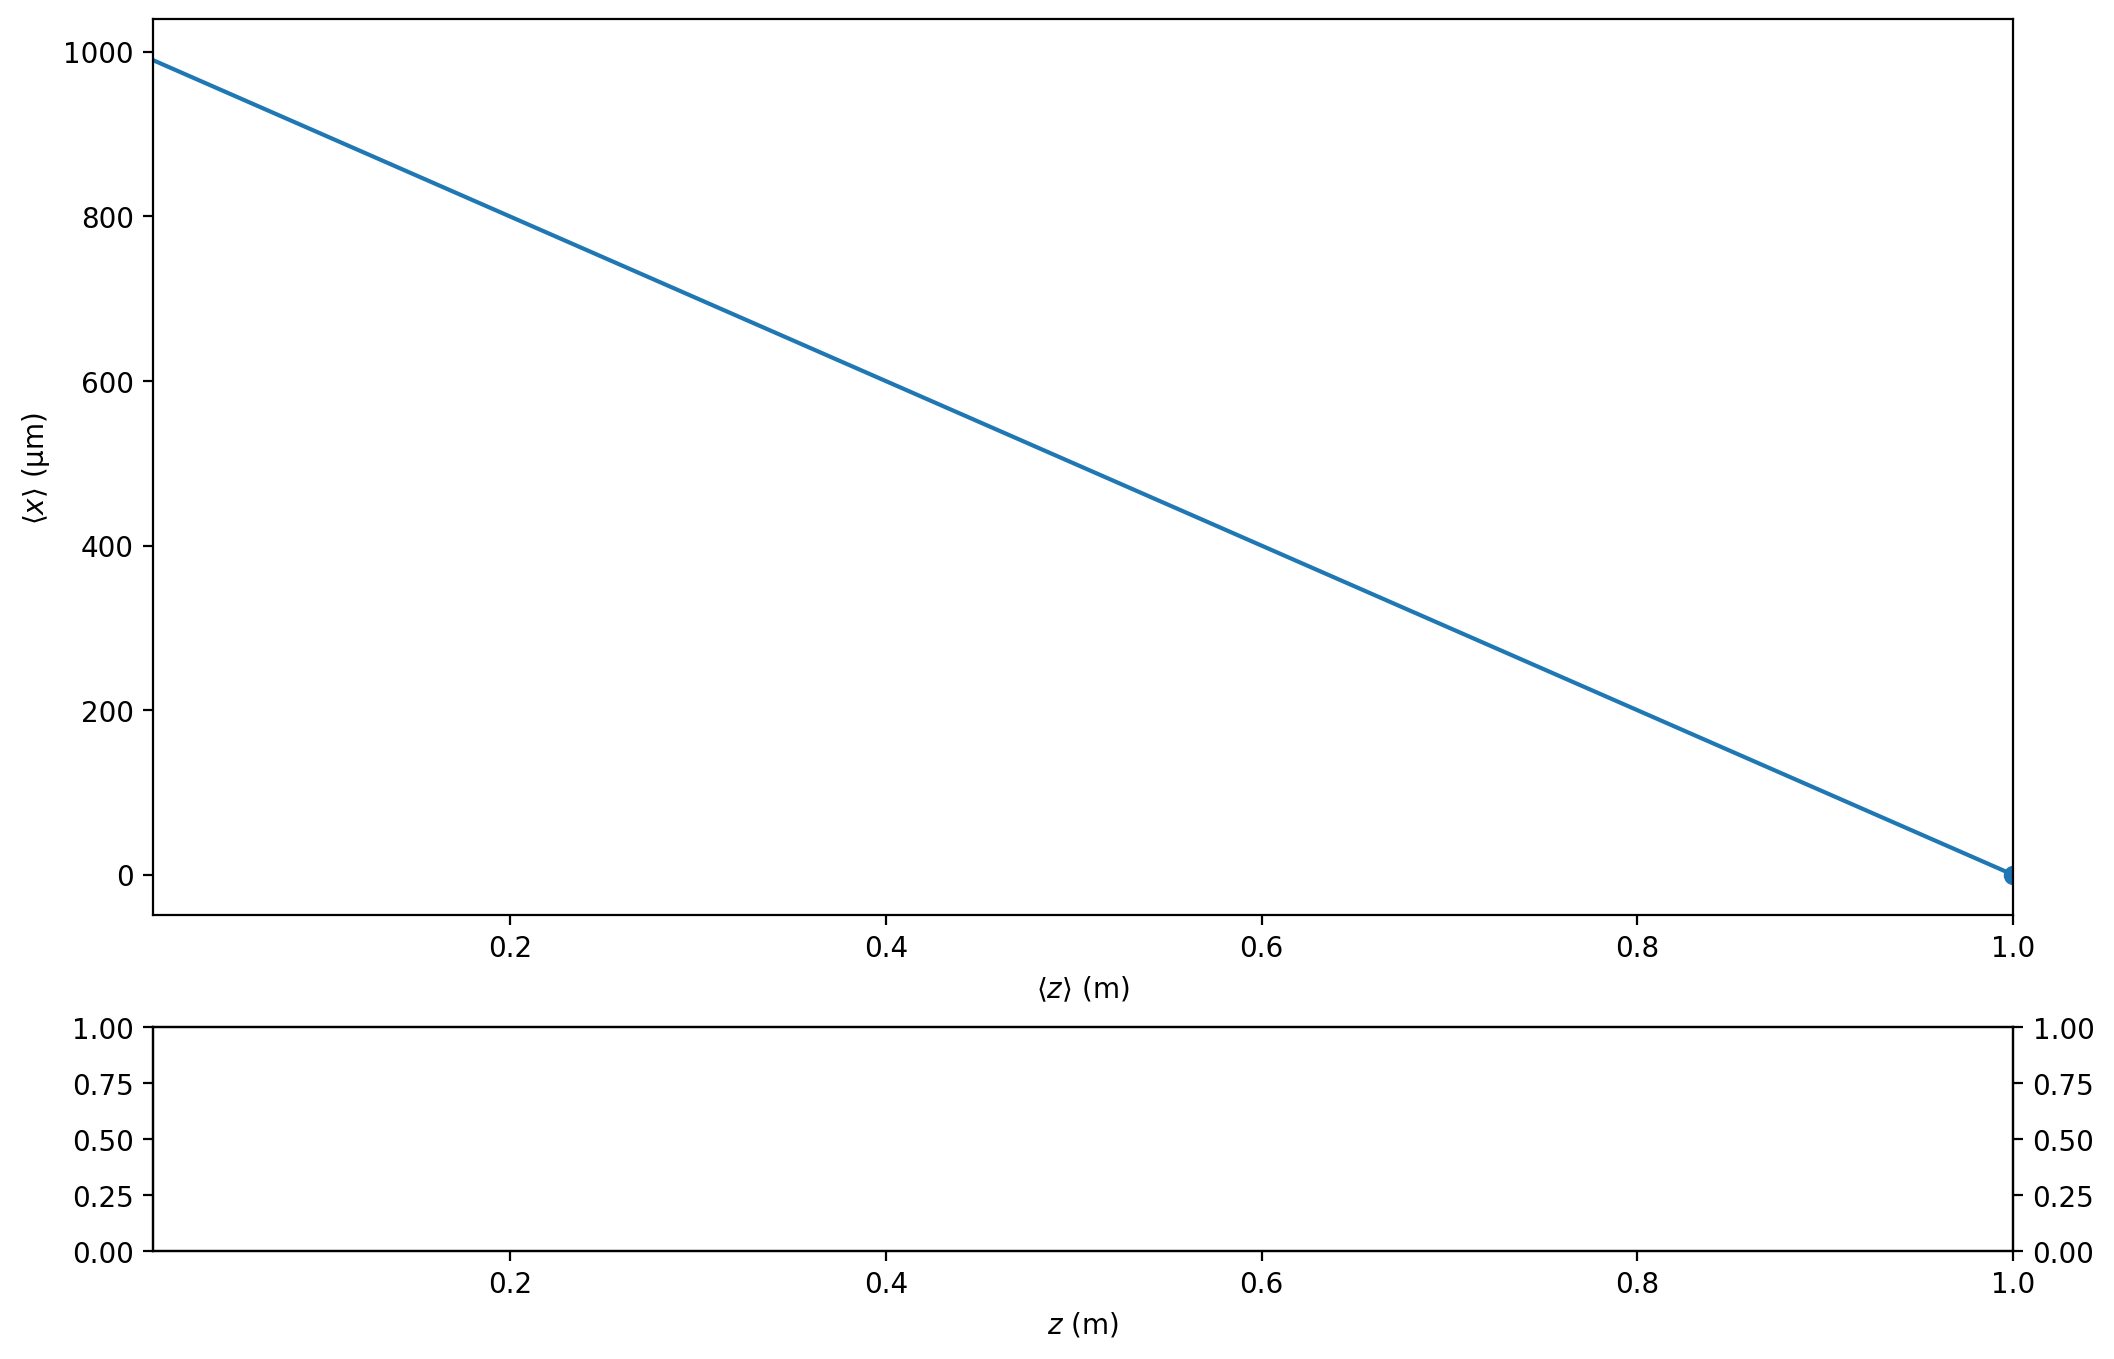

In [65]:
A.plot('mean_x')